## CS 7180 ML for Smart Agriculture
## Ridge Regression and Logistic Regression
## Wed Aug 7, 2024
### Joshua Nougaret



## Ridge Regression
### Problem 1a
Download PS2-1 dataset. Write code in Python that applies Ridge regression to the dataset to compute θ for given λ. Implement two cases i) closed-form solution and ii) stochastic gradient descent with mini-batch of size m. [20 Points]

Case i) closed-form solution

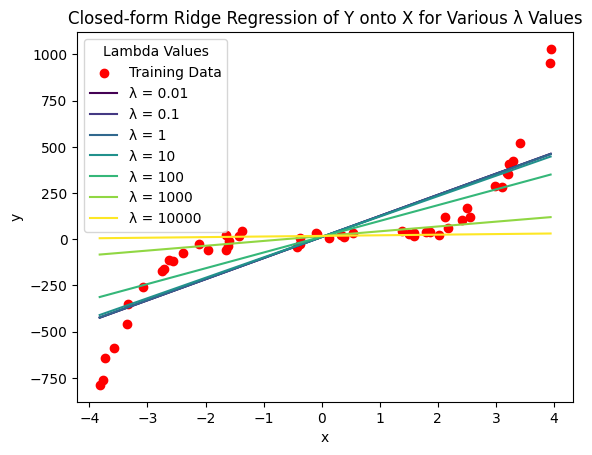

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Download the train data and apply closed-form solution using
# ridge regression on train data
train_path = "/content/train_data.csv"
train = pd.read_csv(train_path)
x_train = train["x"]
y_train = train["y"]
mean_x = np.average(x_train)
mean_y = np.average(y_train)

# standardize the predictors- note: this dataset seems to be already standardized
# x_train_std = x_train.copy()
# n = len(x_train_std)
# for i in range(n):
#   a = x_train_std[i]
#   c = 0
#   for i in range(n):
#     c = c + (a - mean_x)**2
#   b = np.sqrt((1 / n) * c)
#   x_train_std[i] = a / b

# apply ridge regression by adding a lambda penalty term
lambda_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.scatter(x=x_train, y=y_train, color='red', label='Training Data')
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# apply ridge regression for each lambda value
for j, lambda_param in enumerate(lambda_values):
    a = 0
    b = 0
    for i in range(len(x_train)):
        a += (x_train[i] - mean_x) * (y_train[i] - mean_y)
        b += (x_train[i] - mean_x) ** 2

    beta_1 = a / (b + lambda_param)
    beta_0 = mean_y - beta_1 * mean_x

    x = np.linspace(min(x_train), max(x_train), len(x_train))
    y = beta_0 + beta_1 * x
    plt.plot(x, y, color=colors[j], label=f'λ = {lambda_param}')

plt.title("Closed-form Ridge Regression of Y onto X for Various λ Values")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title='Lambda Values')
plt.show()

### Problem 1a (continued)
Case ii) stochastic gradient descent with mini-batch of size m.

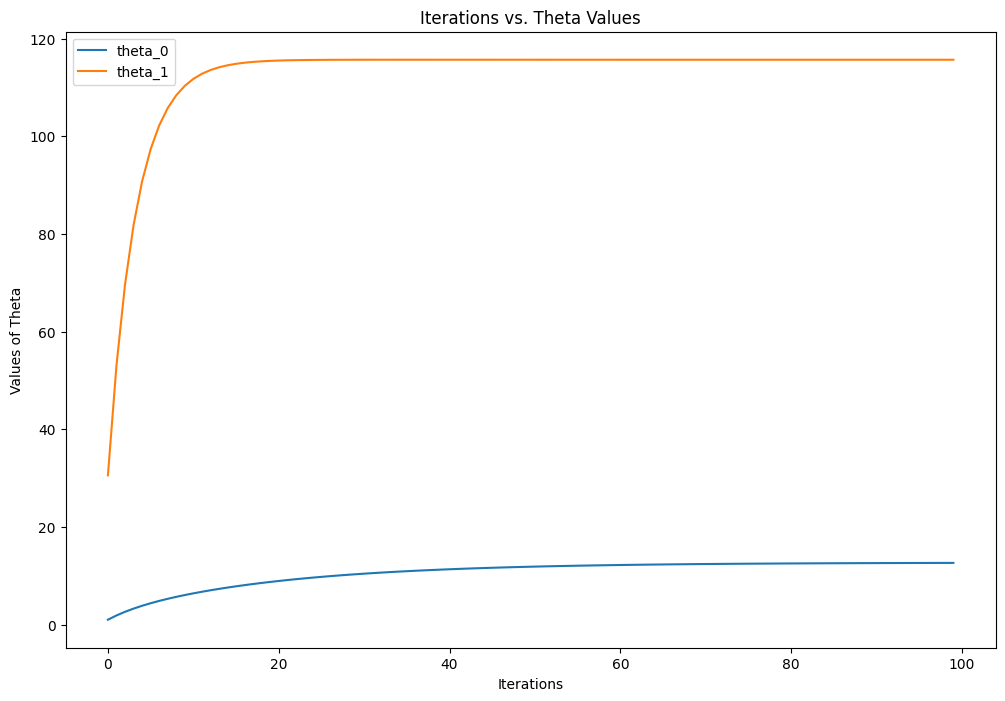

In [2]:
N = len(x_train)
X_train = np.ones((N, 2))
X_train[:, 1] = x_train

# define a function to compute the MSE using ridge regression
def compute_mse(X, y, theta, lambda_param):
    N = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    mse = (1 / (2 * N)) * np.dot(errors.T, errors)

    penalty = (lambda_param / (2 * N)) * np.sum(theta[1:]**2)

    return mse + penalty

# stochastic gradient descent with ridge regression
# store values of theta for each iteration
def gradient_descent(X, y, theta, learning_rate, iterations, batch_size, lambda_param):
    m = len(y)
    theta_iterations = np.zeros((iterations, len(theta)))
    mse_iterations = np.zeros(iterations)

    for i in range(iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch

            gradient = (1 / batch_size) * X_batch.T.dot(errors)
            gradient[1:] += (lambda_param / m) * theta[1:]

            theta -= learning_rate * gradient

        mse_iterations[i] = compute_mse(X, y, theta, lambda_param)
        theta_iterations[i, :] = theta

    return theta, mse_iterations, theta_iterations

theta = np.zeros(2)
learning_rate = 0.01
iterations = 100
batch_size = 10
lambda_param = 1.0

theta_final, mse_iterations, theta_iterations = gradient_descent(
    X_train, y_train, theta, learning_rate, iterations, batch_size, lambda_param)

plt.figure(figsize=(12, 8))
plt.plot(range(iterations), theta_iterations[:, 0], label='theta_0')
plt.plot(range(iterations), theta_iterations[:, 1], label='theta_1')
plt.xlabel('Iterations')
plt.ylabel('Values of Theta')
plt.title('Iterations vs. Theta Values')
plt.legend()
plt.show()


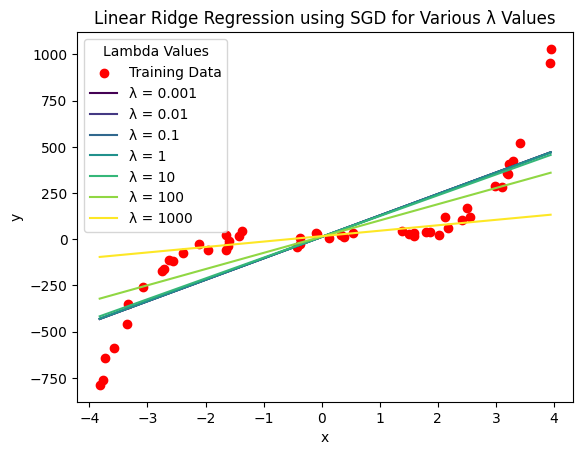

In [3]:
theta = np.zeros(2)
learning_rate = 0.01
iterations = 100
batch_size = 10
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

x = np.linspace(min(x_train), max(x_train), len(x_train))
plt.scatter(x=x_train, y=y_train, color='red', label='Training Data')
colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))

# apply SGD with ridge regression for each lambda value
for j, lambda_param in enumerate(lambda_values):
  theta_final, mse_iterations, theta_iterations = gradient_descent(
      X_train, y_train, theta, learning_rate, iterations, batch_size, lambda_param)
  y = theta_final[0] + theta_final[1] * x

  plt.plot(x, y, color=colors[j], label=f'λ = {lambda_param}')

plt.title("Linear Ridge Regression using SGD for Various λ Values")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title='Lambda Values')
plt.show()

### Problem 1b
Implement K-fold cross validation on the training set to obtain best regularization λ and get optimal θ. Consider root mean squared error (RMSE) as regression error, and report error on test samples. Report optimal λ, θ test and training errors for K ∈ {2, 10, N }, where N is number of samples. For all cases, consider n-degree polynomials, and basis function expansion φ(·) = [1, x, x2 , ...xn ], try n ∈ {2, 5, 10}. [10 Points]


K-Fold Cross-Validation with K=2

Degree 2 polynomial:
Lambda: 0.1, Avg Train RMSE: 321.2049, Avg Val RMSE: 321.2049
Lambda: 1, Avg Train RMSE: 321.2049, Avg Val RMSE: 321.2049
Lambda: 10, Avg Train RMSE: 321.2049, Avg Val RMSE: 321.2049
Lambda: 100, Avg Train RMSE: 321.2055, Avg Val RMSE: 321.2055
Lambda: 1000, Avg Train RMSE: 321.2116, Avg Val RMSE: 321.2116
Lambda: 10000, Avg Train RMSE: 321.2718, Avg Val RMSE: 321.2718
Lambda: 100000, Avg Train RMSE: 321.7235, Avg Val RMSE: 321.7612
Best Lambda for degree 2 and K=2: 0.1
Optimal theta: ['-0.1', '0.3', '-0.1']
Degree 5 polynomial:
Lambda: 0.1, Avg Train RMSE: 220.2996, Avg Val RMSE: 220.2999
Lambda: 1, Avg Train RMSE: 220.2997, Avg Val RMSE: 220.2999
Lambda: 10, Avg Train RMSE: 220.2999, Avg Val RMSE: 220.3002
Lambda: 100, Avg Train RMSE: 220.3025, Avg Val RMSE: 220.3027
Lambda: 1000, Avg Train RMSE: 220.3282, Avg Val RMSE: 220.3285
Lambda: 10000, Avg Train RMSE: 220.5853, Avg Val RMSE: 220.5856
Lambda: 100000, Avg Train RMSE: 222.6

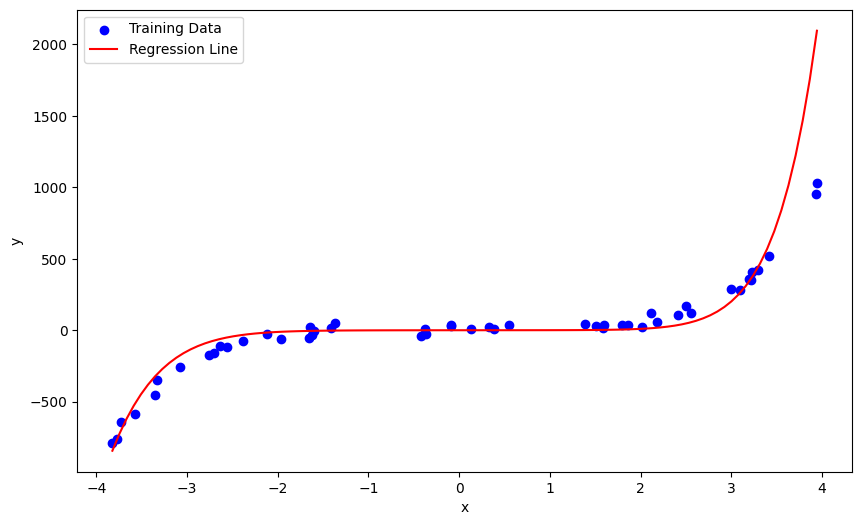

In [4]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

def compute_rmse(X, y, theta, lambda_param):
    N = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    mse = (1 / (2 * N)) * np.dot(errors.T, errors)
    penalty = (lambda_param / (2 * N)) * np.sum(theta[1:]**2)
    return np.sqrt(2 * (mse + penalty))

def gradient_descent(X, y, theta, learning_rate, iterations, batch_size, lambda_param):
    N = len(y)
    for i in range(iterations):
        for j in range(0, N, batch_size):
            X_batch = X[j:j+batch_size]
            y_batch = y[j:j+batch_size]
            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradient = (1 / batch_size) * X_batch.T.dot(errors)
            gradient[1:] += (lambda_param / N) * theta[1:]
            gradient = np.clip(gradient, -1, 1)
            theta -= learning_rate * gradient
    return theta

def format_theta(theta):
    return [f"{coef:.1g}" for coef in theta]

degrees = [2, 5, 10]
learning_rate = 0.0001
iterations = 1000
batch_size = 10
lambda_values = [0.1, 1, 10, 100, 1000, 10000, 100000]
k_values = [2, 10, len(x_train)]

global_best_lambda = None
global_best_theta = None
global_best_rmse = float('inf')

# Run k-fold cross-validation for each degree and lambda value
for k in k_values:
    print(f"\nK-Fold Cross-Validation with K={k}\n")
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for degree in degrees:
        print(f"Degree {degree} polynomial:")

        poly = PolynomialFeatures(degree)
        x_train_np = np.array(x_train).reshape(-1, 1)
        X_train_poly = poly.fit_transform(x_train_np)

        best_lambda = None
        best_theta = None
        best_rmse = float('inf')

        for lambda_param in lambda_values:
            train_rmse_folds = []
            val_rmse_folds = []

            for train_index, val_index in kf.split(X_train_poly):
                X_tr, X_val = X_train_poly[train_index], X_train_poly[val_index]
                y_tr, y_val = y_train[train_index], y_train[val_index]

                theta = np.zeros(X_tr.shape[1])
                theta_final = gradient_descent(X_tr, y_tr, theta, learning_rate, iterations, batch_size, lambda_param)

                train_rmse = compute_rmse(X_tr, y_tr, theta_final, lambda_param)
                val_rmse = compute_rmse(X_val, y_val, theta_final, lambda_param)

                train_rmse_folds.append(train_rmse)
                val_rmse_folds.append(val_rmse)

            # Average RMSE over all folds
            avg_train_rmse = np.mean(train_rmse_folds)
            avg_val_rmse = np.mean(val_rmse_folds)

            if avg_val_rmse < best_rmse and not np.isnan(avg_val_rmse):
                best_rmse = avg_val_rmse
                best_lambda = lambda_param
                best_theta = theta_final

            print(f"Lambda: {lambda_param}, Avg Train RMSE: {avg_train_rmse:.4f}, Avg Val RMSE: {avg_val_rmse:.4f}")

        print(f"Best Lambda for degree {degree} and K={k}: {best_lambda}")
        print(f"Optimal theta: {format_theta(best_theta)}")

        if best_rmse < global_best_rmse:
            global_best_rmse = best_rmse
            global_best_lambda = best_lambda
            global_best_theta = best_theta

print(f"\nGlobal Best Lambda: {global_best_lambda}")
print(f"Global Optimal Theta: {format_theta(global_best_theta)}")

x_range = np.linspace(min(x_train), max(x_train), 100)
poly = PolynomialFeatures(degree)
x_range_poly = poly.fit_transform(x_range.reshape(-1, 1))
y_range = x_range_poly.dot(global_best_theta)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_range, y_range, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Logistic Regression
### Problem 2a
Write code in python that takes input a training dataset D={(x1,y1),...,(xN,yN)}, and its output is the weight vector w in the logistic regression model y = σ(wT x). [15 Points]

In [5]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.01, epochs=1000):
    N, d = X.shape
    w = np.zeros(d)

    # perform gradient descent
    for _ in range(epochs):
        z = np.dot(X, w)
        predictions = sigmoid(z)

        gradient = np.dot(X.T, (predictions - y)) / N
        w -= lr * gradient

    return w


## Problem 2b
Download the dataset PS2-2. Run (a) on training data to compute w and evaluate on test set. Plot the data (use different colors for data for different classes) and plot the decision boundary. [5 Points]

Accuracy on test set: 100.00%


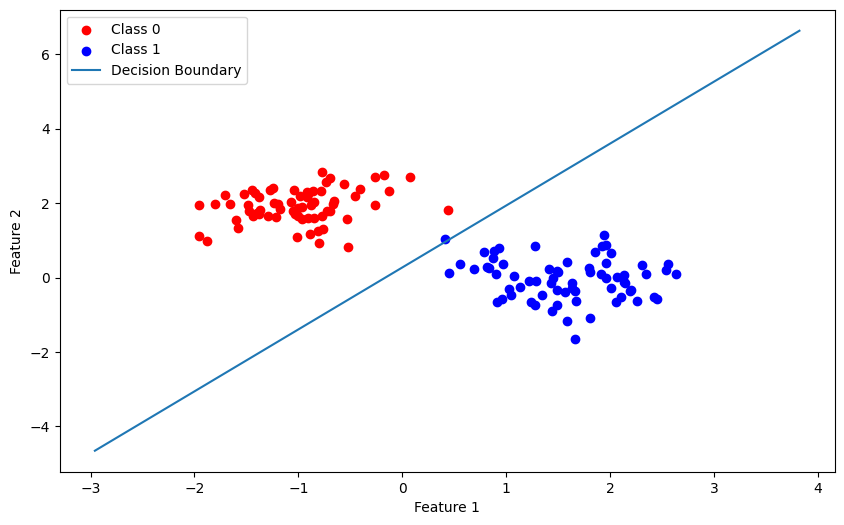

In [6]:
x_train = pd.read_csv("/content/PS2_2_X_Train.csv")
y_train = pd.read_csv("/content/PS2_2_Y_Train.csv")
x_test = pd.read_csv("/content/PS2_2_X_Test.csv")
y_test = pd.read_csv("/content/PS2_2_Y_Test.csv")

def plot_decision_boundary(X, y, w):
    plt.figure(figsize=(10, 6))
    class_0_labeled = False
    class_1_labeled = False

    for i in range(len(y)):
        if y[i] == 0:
            plt.scatter(X[i, 1], X[i, 2], color='red', label='Class 0' if not class_0_labeled else "")
            class_0_labeled = True
        else:
            plt.scatter(X[i, 1], X[i, 2], color='blue', label='Class 1' if not class_1_labeled else "")
            class_1_labeled = True

    x_values = [np.min(X[:, 1] - 1), np.max(X[:, 2] + 1)]
    y_values = -(w[0] + np.dot(w[1], x_values)) / w[2]
    plt.plot(x_values, y_values, label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

X_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train.values))
X_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test.values))
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

w = logistic_regression(X_train, y_train)

test_predictions = sigmoid(np.dot(X_test, w)) >= 0.5
accuracy = np.mean(test_predictions == y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

plot_decision_boundary(X_train, y_train, w)



## Problem 2c
Repeat (b) using PS2-3. Explain the differences between two datasets and justify your results / observations. [5 Points]

- We can see from the plots in 2b and 2c (below) that the two datasets differ in their linear separability.

- The LR model achieved 100% accuracy on the first dataset since we can see that is perfectly linearly separable. The samples for each class are clustered together without overlap so that a linear decision boundary can be drawn to separate each class from the other completely.

- On the second dataset, the LR model achieved a test set accuracy of 92.3%. We can see from the plot that this was caused by a slight overlap in the classes (no simple linear separation or linear decision boundary exists for the dataset). Since the logistic regression model is only able to separate linearly, the points that appear on the opposite side of the linear boundary were incorrectly classified.

Accuracy on test set: 92.31%


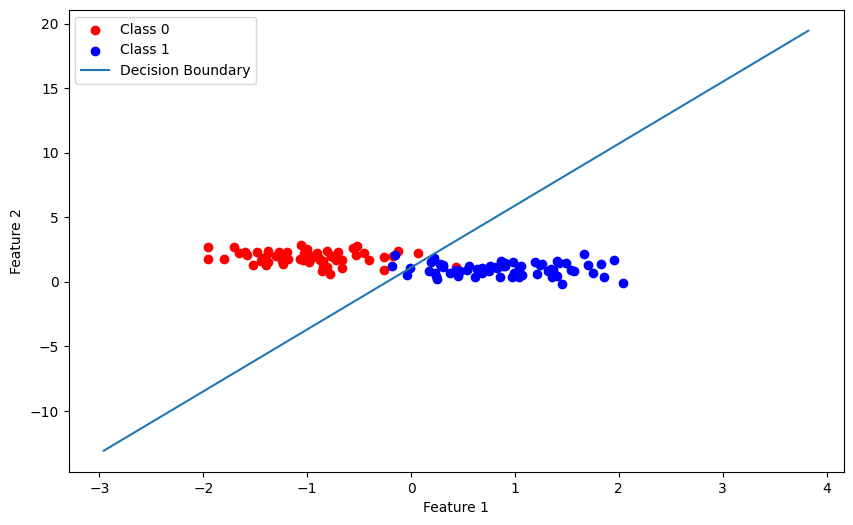

In [7]:
x_train = pd.read_csv("/content/PS2_3_X_Train.csv")
y_train = pd.read_csv("/content/PS2_3_Y_Train.csv")
x_test = pd.read_csv("/content/PS2_3_X_Test.csv")
y_test = pd.read_csv("/content/PS2_3_Y_Test.csv")

X_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train.values))
X_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test.values))
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

w = logistic_regression(X_train, y_train)

test_predictions = sigmoid(np.dot(X_test, w)) >= 0.5
accuracy = np.mean(test_predictions == y_test)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

plot_decision_boundary(X_train, y_train, w)
